## Real-Estate Market comprehension:

In [1]:
# importing libraries:

In [1]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
import os
import joblib
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
import os
import joblib
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score,confusion_matrix, classification_report)

In [4]:
# Loading the dataset
df = pd.read_csv(r"Dataset/Melbourne_housing_FULL.csv")
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,03-09-2016,2.5,3067,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03-12-2016,2.5,3067,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04-02-2016,2.5,3067,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,04-02-2016,2.5,3067,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04-03-2017,2.5,3067,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19960,Fitzroy,130 Gore St,3,h,2300000.0,S,Jellis,03-09-2017,2.1,3065,...,2.0,1.0,203.0,163.0,1890.0,Yarra City Council,-37.80475,144.98228,Northern Metropolitan,5825.0
19961,Fitzroy,101/150 Kerr St,2,u,630000.0,S,Purplebricks,03-09-2017,2.1,3065,...,1.0,1.0,NaN,63.0,2011.0,Yarra City Council,-37.79708,144.98042,Northern Metropolitan,5825.0
19962,Fitzroy,15 Westgarth St,3,h,905000.0,S,Nelson,03-09-2017,2.1,3065,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,5825.0
19963,Fitzroy North,84 May St,4,h,2136000.0,S,Nelson,03-09-2017,3.6,3068,...,1.0,3.0,NaN,NaN,NaN,Moreland City Council,-37.77625,144.98623,Northern Metropolitan,6244.0


In [5]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,03-09-2016,2.5,3067,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03-12-2016,2.5,3067,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04-02-2016,2.5,3067,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,04-02-2016,2.5,3067,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04-03-2017,2.5,3067,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [9]:
df.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
19960,Fitzroy,130 Gore St,3,h,2300000.0,S,Jellis,03-09-2017,2.1,3065,...,2.0,1.0,203.0,163.0,1890.0,Yarra City Council,-37.80475,144.98228,Northern Metropolitan,5825.0
19961,Fitzroy,101/150 Kerr St,2,u,630000.0,S,Purplebricks,03-09-2017,2.1,3065,...,1.0,1.0,NaN,63.0,2011.0,Yarra City Council,-37.79708,144.98042,Northern Metropolitan,5825.0
19962,Fitzroy,15 Westgarth St,3,h,905000.0,S,Nelson,03-09-2017,2.1,3065,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,5825.0
19963,Fitzroy North,84 May St,4,h,2136000.0,S,Nelson,03-09-2017,3.6,3068,...,1.0,3.0,NaN,NaN,NaN,Moreland City Council,-37.77625,144.98623,Northern Metropolitan,6244.0
19964,Fitzroy North,17/140 Queens Pde,2,u,NaN,PI,Jellis,03-09-2017,3.6,3068,...,1.0,1.0,NaN,NaN,NaN,Moreland City Council,-37.79100,144.98425,Northern Metropolitan,6244.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19965 entries, 0 to 19964
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         19965 non-null  object 
 1   Address        19965 non-null  object 
 2   Rooms          19965 non-null  int64  
 3   Type           19965 non-null  object 
 4   Price          15575 non-null  float64
 5   Method         19965 non-null  object 
 6   SellerG        19965 non-null  object 
 7   Date           19965 non-null  object 
 8   Distance       19965 non-null  float64
 9   Postcode       19965 non-null  int64  
 10  Bedroom2       15894 non-null  float64
 11  Bathroom       15894 non-null  float64
 12  Car            15888 non-null  float64
 13  Landsize       15769 non-null  float64
 14  BuildingArea   8479 non-null   float64
 15  YearBuilt      9758 non-null   float64
 16  CouncilArea    19964 non-null  object 
 17  Lattitude      16013 non-null  float64
 18  Longti

In [8]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,19965.000000,1.557500e+04,19965.000000,19965.000000,15894.000000,15894.000000,15888.000000,15769.000000,8479.000000,9758.000000,16013.000000,16013.000000,19964.000000
mean,2.950163,1.056277e+06,9.892281,3106.770148,2.912420,1.553353,1.587739,538.904877,148.967738,1963.468539,-37.811911,144.997685,7506.232719
std,0.979897,6.466437e+05,5.573148,88.769695,1.004554,0.714532,0.973227,3697.103160,138.510754,37.973038,0.074564,0.098938,4410.315046
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.184180,144.431620,249.000000
25%,2.000000,6.310000e+05,6.100000,3046.000000,2.000000,1.000000,1.000000,166.000000,93.000000,1940.000000,-37.857300,144.939270,4407.000000
50%,3.000000,8.800000e+05,9.200000,3101.000000,3.000000,1.000000,2.000000,412.000000,127.000000,1970.000000,-37.808700,145.001500,6763.000000
75%,4.000000,1.302750e+06,12.600000,3147.000000,3.000000,2.000000,2.000000,650.000000,178.000000,1999.000000,-37.761110,145.056810,10331.000000
max,12.000000,9.000000e+06,47.400000,3978.000000,30.000000,12.000000,26.000000,433014.000000,6791.000000,2106.000000,-37.413810,145.526350,21650.000000


In [10]:
df.shape

(19965, 21)

In [11]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             4390
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2          4071
Bathroom          4071
Car               4077
Landsize          4196
BuildingArea     11486
YearBuilt        10207
CouncilArea          1
Lattitude         3952
Longtitude        3952
Regionname           1
Propertycount        1
dtype: int64

In [14]:
df.fillna(np.mean,inplace=True)

In [15]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [16]:
df.duplicated().sum()

1

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.duplicated().sum()

0

In [22]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [16]:
df['Regionname'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria', nan], dtype=object)

In [23]:
df.nunique()

Suburb             330
Address          19625
Rooms               11
Type                 3
Price             2314
Method               9
SellerG            308
Date                53
Distance           209
Postcode           204
Bedroom2            14
Bathroom            11
Car                 14
Landsize          1523
BuildingArea       668
YearBuilt          155
CouncilArea         34
Lattitude         6420
Longtitude        7028
Regionname           9
Propertycount      327
dtype: int64

## Exploratory data analysis:

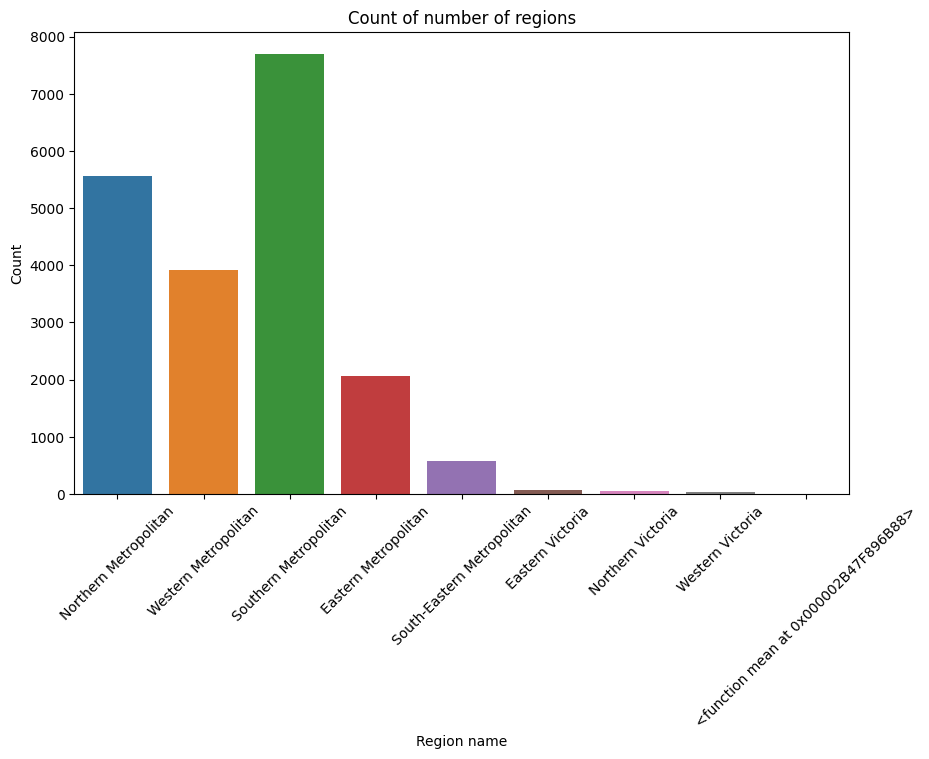

In [28]:

# Plotting the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Regionname')
plt.title('Count of number of regions')
plt.xlabel('Region name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

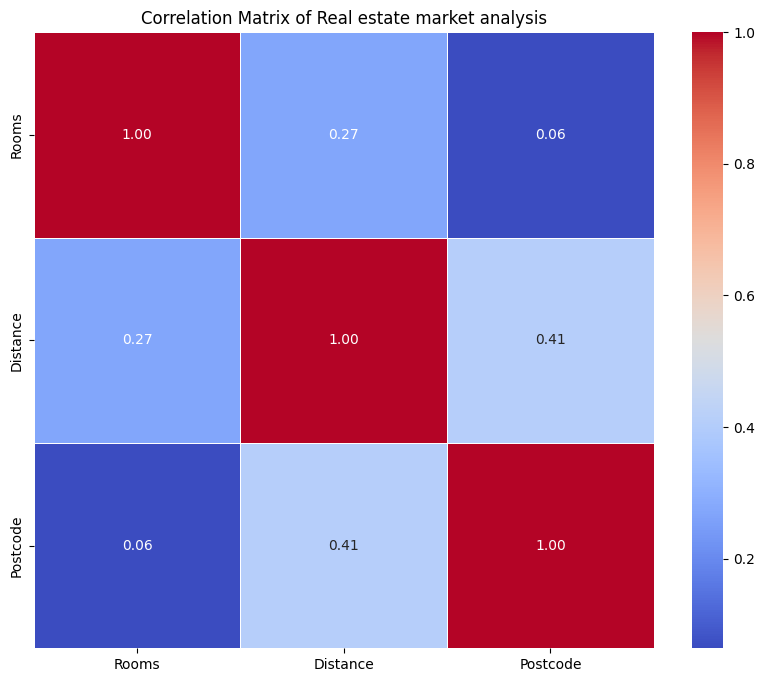

In [29]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Real estate market analysis')
plt.show()

## Label encoding:

In [31]:
le=LabelEncoder()

In [37]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column].astype(str))


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19964 entries, 0 to 19964
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         19964 non-null  int32  
 1   Address        19964 non-null  int32  
 2   Rooms          19964 non-null  int64  
 3   Type           19964 non-null  int32  
 4   Price          19964 non-null  int32  
 5   Method         19964 non-null  int32  
 6   SellerG        19964 non-null  int32  
 7   Date           19964 non-null  int32  
 8   Distance       19964 non-null  float64
 9   Postcode       19964 non-null  int64  
 10  Bedroom2       19964 non-null  int32  
 11  Bathroom       19964 non-null  int32  
 12  Car            19964 non-null  int32  
 13  Landsize       19964 non-null  int32  
 14  BuildingArea   19964 non-null  int32  
 15  YearBuilt      19964 non-null  int32  
 16  CouncilArea    19964 non-null  int32  
 17  Lattitude      19964 non-null  int32  
 18  Longti

In [39]:
## x and  Y variable separation:

In [40]:
x=df.iloc[:,0:20]

In [41]:
x

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
0,0,16995,2,0,2313,6,128,2,2.5,3067,3,1,1,200,667,154,32,2940,3271,3
1,0,18755,2,0,465,2,28,4,2.5,3067,3,1,1,465,667,154,32,2897,3333,3
2,0,8859,2,0,42,2,28,5,2.5,3067,3,1,0,333,620,35,32,3100,3212,3
3,0,5660,3,2,2313,7,240,5,2.5,3067,5,3,1,0,667,154,32,3178,3674,3
4,0,14495,3,0,451,5,28,6,2.5,3067,5,3,0,241,130,35,32,3139,3237,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19960,129,3699,3,0,893,2,128,3,2.1,3065,5,3,1,471,156,26,32,3030,2950,3
19961,129,1958,2,2,1733,2,216,3,2.1,3065,3,1,1,1522,575,145,32,2831,2915,3
19962,129,4520,3,0,2193,2,182,3,2.1,3065,13,10,13,1522,667,154,32,6419,7027,3
19963,130,18724,4,0,835,2,182,3,3.6,3068,7,1,6,1522,667,154,25,2268,3028,3


In [42]:
y=df.iloc[:,-1]

In [43]:
y

0        179
1        179
2        179
3        179
4        179
        ... 
19960    243
19961    243
19962    243
19963    253
19964    253
Name: Propertycount, Length: 19964, dtype: int32

In [44]:
# train, test and split:

In [46]:
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=42)

In [47]:
X_train.shape

(15971, 20)

In [48]:
X_test.shape

(3993, 20)

In [49]:
y_train.shape

(15971,)

In [50]:
y_test.shape

(3993,)

In [51]:
mae_list = []
mse_list = []
rmse_list = []
r2_list = []

def calculateMetrics(algorithm,predict, testY):
    
        # Regression metrics
        mae = mean_absolute_error(testY, predict)
        mse = mean_squared_error(testY, predict)
        rmse = np.sqrt(mse)
        r2 = r2_score(testY, predict)
        
        mae_list.append(mae)
        mse_list.append(mse)
        rmse_list.append(rmse)
        r2_list.append(r2)
        
        print(f"{algorithm} Mean Absolute Error (MAE): {mae:.2f}")
        print(f"{algorithm} Mean Squared Error (MSE): {mse:.2f}")
        print(f"{algorithm} Root Mean Squared Error (RMSE): {rmse:.2f}")
        print(f"{algorithm} R-squared (R²): {r2:.2f}")
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=testY, y=predict, alpha=0.6)
        plt.plot([min(testY), max(testY)], [min(testY), max(testY)], 'r--', lw=2)  # Line of equality
        plt.xlabel('True Values')
        plt.ylabel('Predictions')
        plt.title(algorithm)
        plt.grid(True)
        plt.show()

Model saved successfully.
KNeighborsRegressor Mean Absolute Error (MAE): 75.56
KNeighborsRegressor Mean Squared Error (MSE): 9125.85
KNeighborsRegressor Root Mean Squared Error (RMSE): 95.53
KNeighborsRegressor R-squared (R²): 0.14


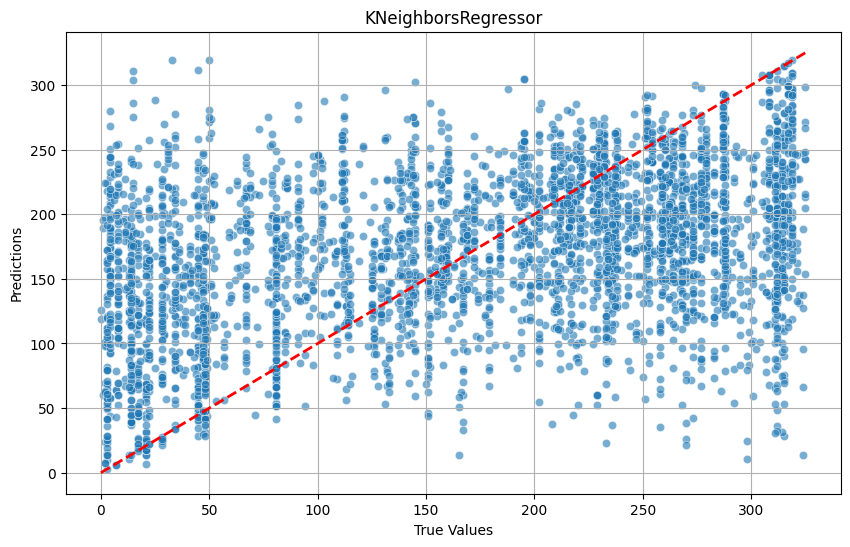

In [52]:
if os.path.exists('KNeighborsRegressor.pkl'):
    # Load the trained model from the file
    knn = joblib.load('KNeighborsRegressor.pkl')
    print("Model loaded successfully.")
    predict = knn.predict(X_test)
    calculateMetrics("KNeighborsRegressor", predict, y_test)
else:
    # Train the model (assuming X_train and y_train are defined)
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    # Save the trained model to a file
    joblib.dump(knn, 'KNeighborsRegressor.pkl')
    print("Model saved successfully.")
    predict = knn.predict(X_test)
    calculateMetrics("KNeighborsRegressor", predict, y_test)

Model saved successfully.
ExtraTreesRegressor Mean Absolute Error (MAE): 1.72
ExtraTreesRegressor Mean Squared Error (MSE): 36.48
ExtraTreesRegressor Root Mean Squared Error (RMSE): 6.04
ExtraTreesRegressor R-squared (R²): 1.00


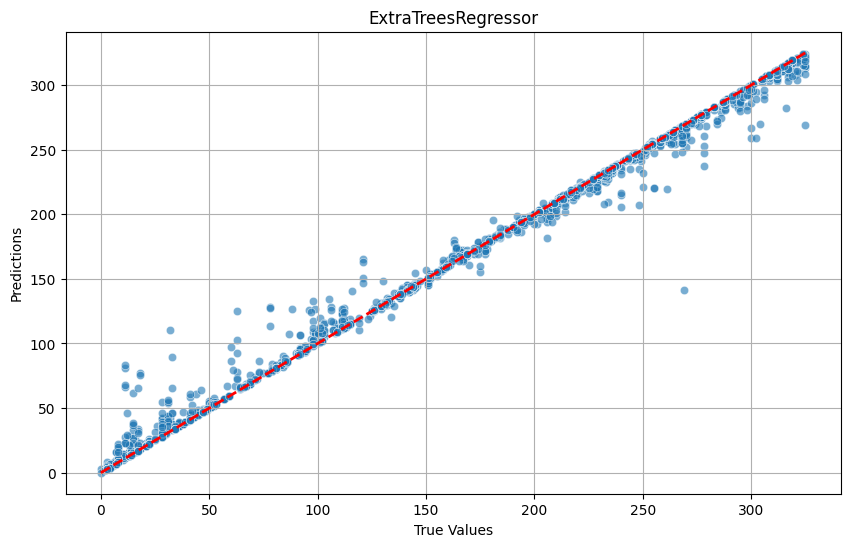

In [53]:
if os.path.exists('ExtraTrees_model.pkl'):
    # Load the trained model from the file
    ex = joblib.load('ExtraTrees_model.pkl')
    print("Model loaded successfully.")
    predict = ex.predict(X_test)
    calculateMetrics("ExtraTreesRegressor", predict, y_test)
else:
    # Train the model (assuming X_train and y_train are defined)
    ex = ExtraTreesRegressor()
    ex.fit(X_train, y_train)
    # Save the trained model to a file
    joblib.dump(ex, 'ExtraTrees_model.pkl')
    print("Model saved successfully.")
    predict = ex.predict(X_test)
    calculateMetrics("ExtraTreesRegressor", predict, y_test)

In [ ]:
data_without_target = data.drop(columns=['target'])

# Save the data without the target column to a new CSV file
data_without_target.to_csv('newfile.csv', index=False)